### Modeling Rush Yards Per Game 

Modeling Framework 
1. Fit a few candidate models
    * Elastic net regression
2. Train / test split 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

db_name = '../pythonsqlite.db'

conn = sqlite3.connect(db_name)


In [2]:
query = "select * from rushing_model_data"

df = pd.read_sql_query(query, con=conn)


In [3]:
df.head().T


,0,1,2,3,4
Name,Adam Humphries,Adam Thielen,Adam Thielen,Adam Thielen,Adam Thielen
Week,2.0,16.0,15.0,6.0,3.0
Team,TEN,MIN,MIN,MIN,MIN
Opp,vs IND,vs GB,@ LAC,vs PHI,vs OAK
Score,L 17-19,L 10-23,W 39-10,W 38-20,W 34-14
rush_fantasy_pts,0.1,0.2,0.3,0,6.1
lag1_fantasy_pts,6.975,11.8925,0.2,0.3,0
lag2_fantasy_pts,6.975,11.8925,11.8925,0.2,0.3
avg_pts_3weeks,6.975,11.8925,0.2,0.25,0.166667
lag1_yds,51.0,85.8,2,3,0


In [12]:
target = ['rush_fantasy_pts']
lags = ['lag1_yds', 'lag2_yds', 'lag1_fantasy_pts',
        'lag2_fantasy_pts', 'lag1_tds', 'lag2_tds']
avgs = ['avg_tds_3weeks', 'avg_yds_3weeks', 'avg_pts_3weeks']
ratio = ['td_ratio', 'pts_ratio', 'yds_ratio']

df_noNull = df.replace(np.inf, 0)
df_noNull = df_noNull.fillna(0)
df_noNull[target+lags+avgs+ratio] = df_noNull[target +
                                              lags+avgs+ratio].astype(float)


In [30]:
inputs = avgs + ratio + lags + target + ['Week'] + ['Name']

model_data = df_noNull[inputs]
model_data.loc[model_data.rush_fantasy_pts < 0, 'rush_fantasy_pts'] = 0

model_data.head().T


,0,1,2,3,4
avg_tds_3weeks,0.3125,0.5625,0.0,0.0,0.0
avg_yds_3weeks,51.0,85.8,2.0,2.5,1.666667
avg_pts_3weeks,6.975,11.8925,0.2,0.25,0.166667
td_ratio,1.0,1.0,0.0,0.0,0.0
pts_ratio,1.0,1.0,1.0,1.2,0.0
yds_ratio,1.0,1.0,1.0,1.2,0.0
lag1_yds,51.0,85.8,2.0,3.0,0.0
lag2_yds,51.0,85.8,85.8,2.0,3.0
lag1_fantasy_pts,6.975,11.8925,0.2,0.3,0.0
lag2_fantasy_pts,6.975,11.8925,11.8925,0.2,0.3


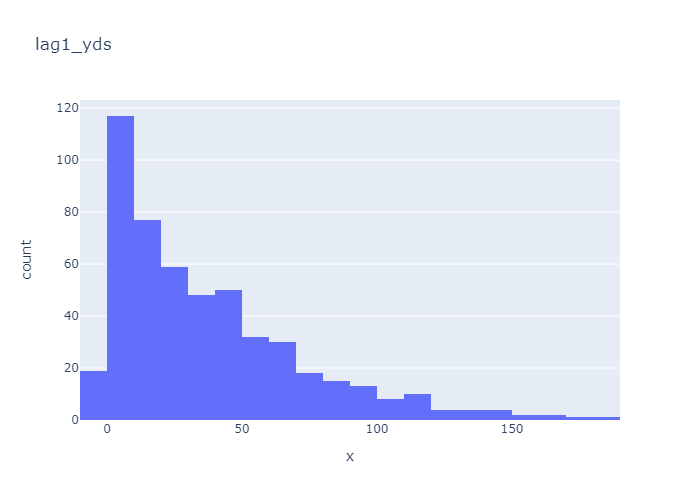

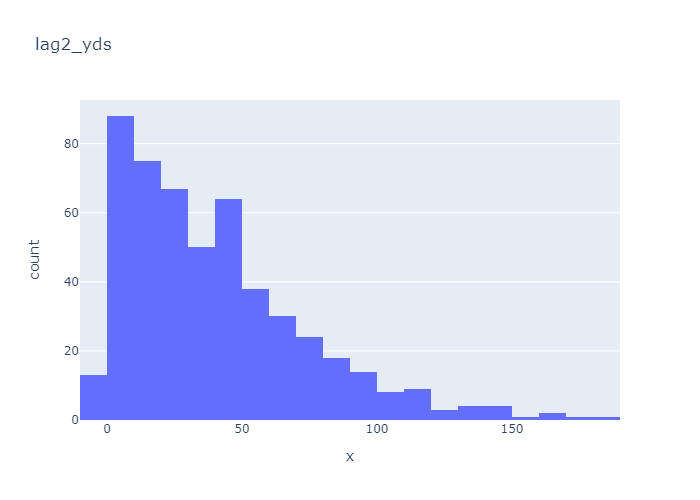

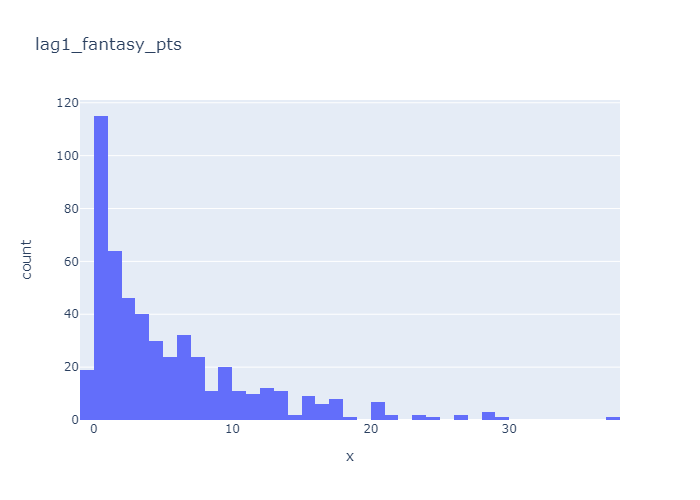

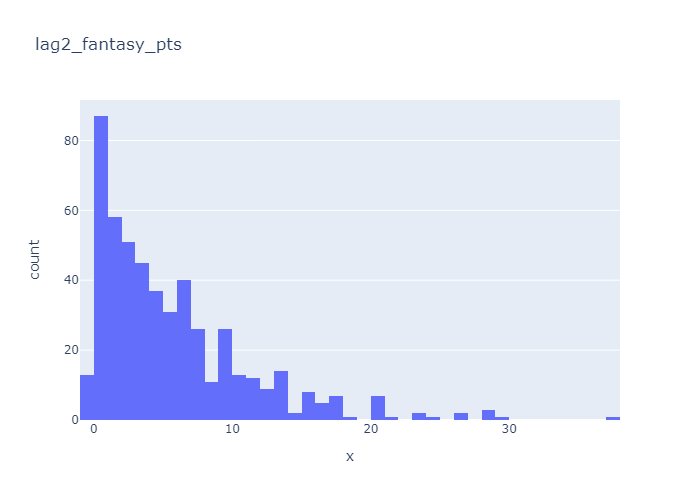

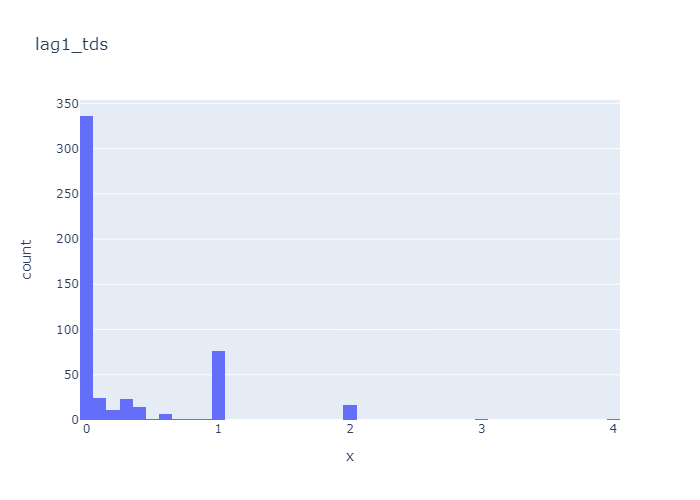

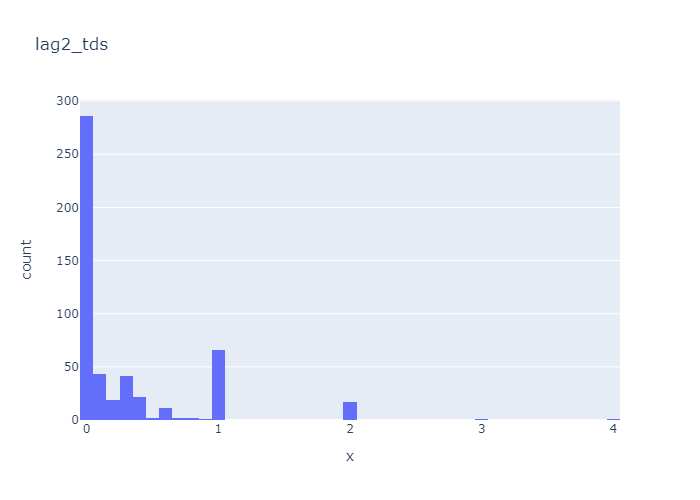

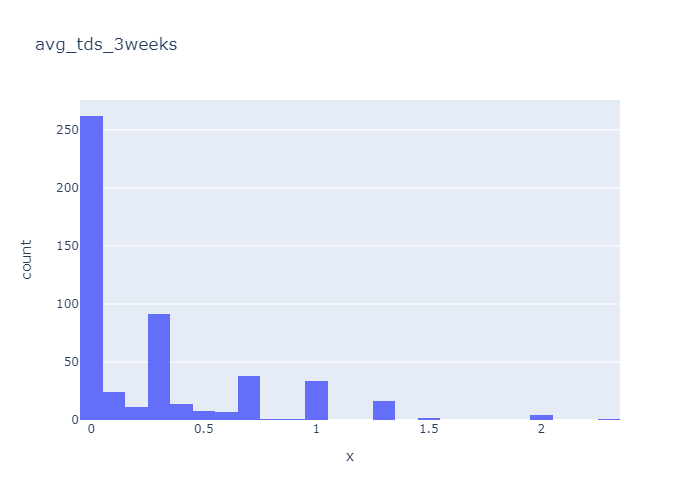

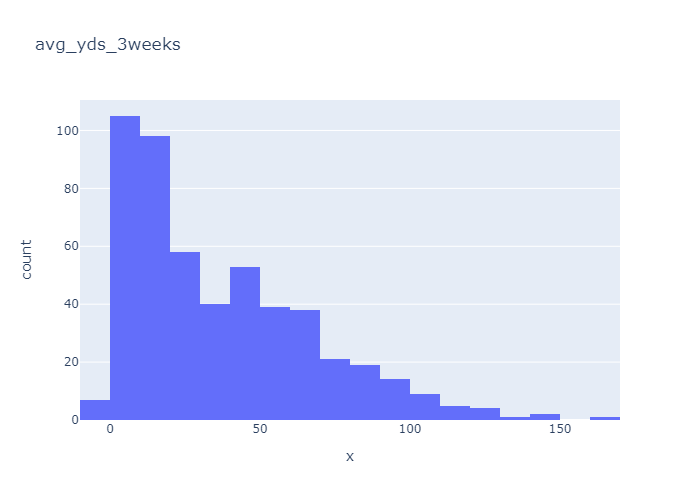

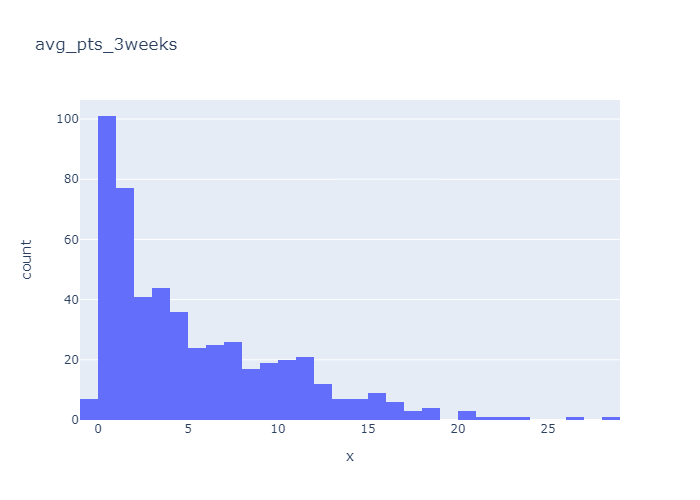

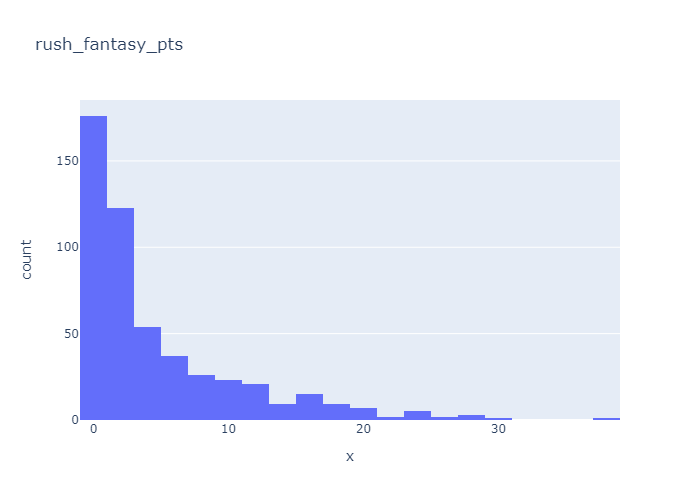

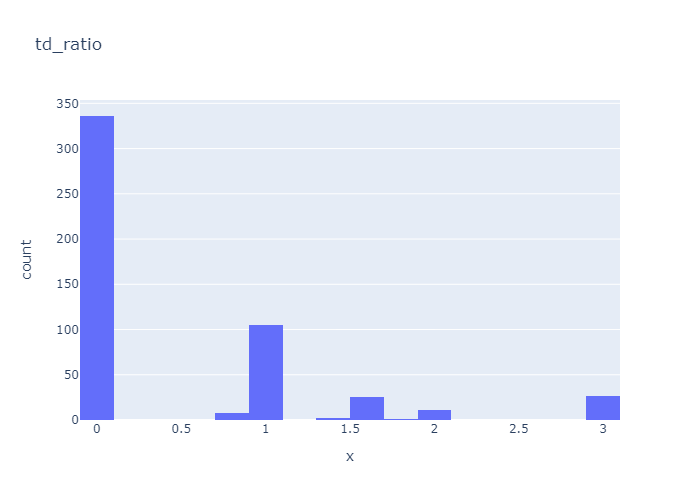

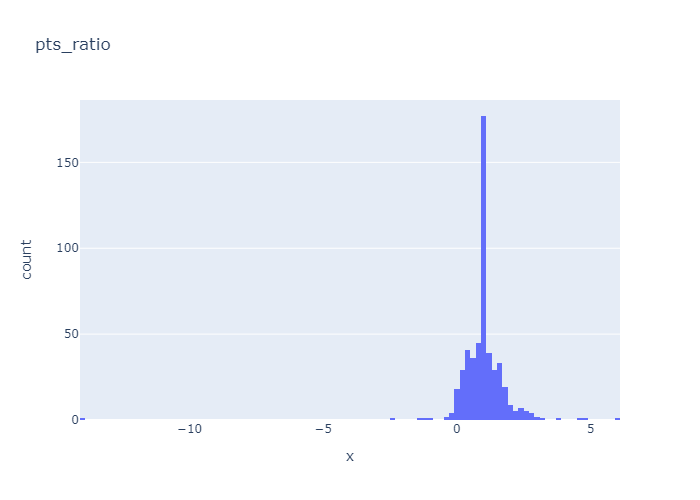

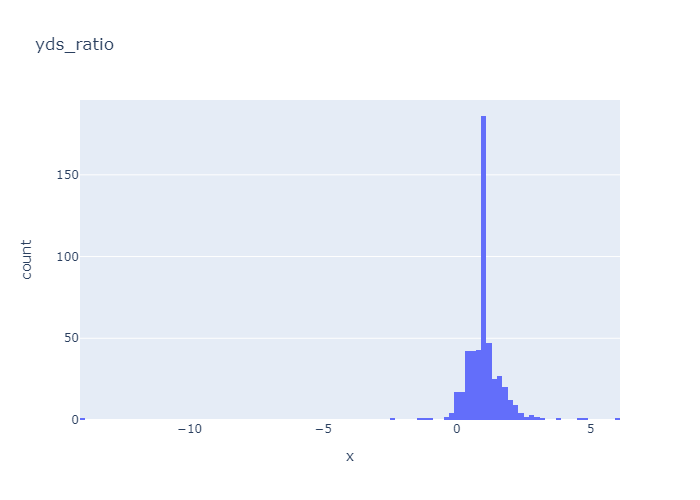

In [31]:
for i in lags+avgs+target+ratio:
    px.histogram(
        x=model_data.loc[:, i],
        title=i
    ).show(renderer='png')


In [32]:
# creating some log features
for i in ['lag1_yds', 'lag2_yds', 'lag1_fantasy_pts', 'lag2_fantasy_pts'] + avgs:
    col = 'log1p_' + i
    model_data.loc[:, col] = np.log1p(model_data.loc[:, i])


In [33]:
model_data.head().T


,0,1,2,3,4
avg_tds_3weeks,0.3125,0.5625,0.0,0.0,0.0
avg_yds_3weeks,51.0,85.8,2.0,2.5,1.666667
avg_pts_3weeks,6.975,11.8925,0.2,0.25,0.166667
td_ratio,1.0,1.0,0.0,0.0,0.0
pts_ratio,1.0,1.0,1.0,1.2,0.0
yds_ratio,1.0,1.0,1.0,1.2,0.0
lag1_yds,51.0,85.8,2.0,3.0,0.0
lag2_yds,51.0,85.8,85.8,2.0,3.0
lag1_fantasy_pts,6.975,11.8925,0.2,0.3,0.0
lag2_fantasy_pts,6.975,11.8925,11.8925,0.2,0.3


## Fitting Models

### Fitting Mixed Model

In [24]:
# importing statsmodels packages
import statsmodels.api as sm


In [77]:
# fit a regularized regression model

model_cols = [
    'log1p_lag1_yds', 'log1p_lag2_yds', 'log1p_lag1_fantasy_pts',
    'log1p_lag2_fantasy_pts', 'log1p_avg_tds_3weeks',
    'log1p_avg_yds_3weeks', 'log1p_avg_pts_3weeks',
    'td_ratio', 'yds_ratio', 'pts_ratio', 'lag1_tds', 'lag2_tds']

model_data[model_cols] = model_data[model_cols].replace(
    np.inf, np.nan).replace(-np.inf, np.nan).fillna(0)

pens = [.001, .01, .1, .25, .5, 1, 10]

for i in pens:
    j = 0
    rmse_score = []
    mae_score = []
    while j < 10:

        # split the data into train/test
        y_train, y_test, x_train, x_test = train_test_split(
            np.log1p(model_data['rush_fantasy_pts']), model_data[model_cols], test_size=.25)

        elastic_net = sm.OLS(endog=y_train, exog=sm.add_constant(x_train)).fit_regularized(
            method='elastic_net',
            L1_wt=.5,
            alpha=i
        )

        net_preds = elastic_net.predict(sm.add_constant(x_test))
        rmse = np.sqrt(
            np.sum((y_test - net_preds)**2)/len(y_test))
        mae = np.mean(np.abs(y_test - net_preds))

        j += 1
        rmse_score.append(rmse)
        mae_score.append(mae)

    agg_rmse = np.mean(rmse_score)
    agg_mae = np.mean(mae_score)

    print(
        f"""RMSE: {agg_rmse}, MAE: {agg_mae} with pentalty {i}"""
    )


RMSE: 0.8033751090815471, MAE: 0.6566732307669512 with pentalty 0.001
RMSE: 0.8074318529634482, MAE: 0.6566611929166146 with pentalty 0.01
RMSE: 0.812041677819375, MAE: 0.6626273429009075 with pentalty 0.1
RMSE: 0.8270432288955218, MAE: 0.6816894198930579 with pentalty 0.25
RMSE: 0.8358330568740031, MAE: 0.689669166766185 with pentalty 0.5
RMSE: 0.850465740968389, MAE: 0.6947693743670523 with pentalty 1
RMSE: 1.562727102252086, MAE: 1.2498471487577336 with pentalty 10


In [78]:
final_model = sm.OLS(endog=np.log1p(model_data['rush_fantasy_pts']),
                     exog=sm.add_constant(model_data[model_cols])).fit_regularized(
    method='elastic_net',
    L1_wt=.5,
    alpha=0.001
)


In [81]:
dict(final_model.params)


{'const': 0.33697164024979903,
 'log1p_lag1_yds': 0.1308206925883579,
 'log1p_lag2_yds': 0.030591663691906485,
 'log1p_lag1_fantasy_pts': 0.12085740262294989,
 'log1p_lag2_fantasy_pts': -0.0047242615676273275,
 'log1p_avg_tds_3weeks': 0.8775577188274626,
 'log1p_avg_yds_3weeks': 0.004668505075733607,
 'log1p_avg_pts_3weeks': 0.1400540999502769,
 'td_ratio': -0.16218694683189264,
 'yds_ratio': -0.04041701489012791,
 'pts_ratio': 0.0,
 'lag1_tds': 0.04214429727694715,
 'lag2_tds': -0.08460843385278495}

In [83]:
import json 

json.dump(dict(final_model.params), open('rush_model_params.json', 'w'))